In [4]:
import pynq
from pynq import Overlay
from pynq.lib.dma import DMA
import numpy as np
from pynq import allocate

# Load the overlay that includes the axi_dma_loopback module
overlay = Overlay("design_1.bit")
dma = overlay.axi_dma_0

t = [1, 2, 3, 4, 5, 6, 7]
n = len(t)

array_t = np.array(t)

sample = array_t.astype(np.int32)

In [5]:
# Allocate buffers for the input and output signals
with allocate(shape=(n,), dtype=np.int32) as in_buffer, \
    allocate(shape=(n,), dtype=np.int32) as out_buffer:
    np.copyto(in_buffer,sample)
    dma.sendchannel.transfer(in_buffer)
    dma.recvchannel.transfer(out_buffer)

    dma.sendchannel.wait()
    dma.recvchannel.wait()
    print(in_buffer)
    print(out_buffer)

[1 2 3 4 5 6 7]
[0 1 1 2 2 3 3]


# random numbers

In [6]:
import pynq
from pynq import Overlay
from pynq.lib.dma import DMA
import numpy as np
from pynq import allocate
import cv2

# Load the overlay that includes the axi_dma_loopback module
overlay = Overlay("design_1.bit")
dma = overlay.axi_dma_0

In [7]:
image_size = 256*256
input_buffer = allocate(shape=(image_size,), dtype=np.uint8)
output_buffer = allocate(shape=(image_size,), dtype=np.uint8)

In [8]:
input_buffer[:] = np.full((image_size,), 200, dtype=np.uint8)

In [9]:
input_buffer

PynqBuffer([200, 200, 200, ..., 200, 200, 200], dtype=uint8)

In [10]:
dma.sendchannel.transfer(input_buffer)
dma.recvchannel.transfer(output_buffer)
dma.sendchannel.wait()
dma.recvchannel.wait()
print(output_buffer)

[100 100 100 ... 100 100 100]


# Image

In [11]:
import cv2

In [12]:
image_path = "hailee.jpg"

In [13]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [14]:
image

array([[227, 224, 224, ..., 216, 218, 219],
       [226, 223, 224, ..., 217, 221, 221],
       [224, 223, 224, ..., 219, 223, 222],
       ...,
       [234, 228, 225, ..., 208, 209, 209],
       [232, 227, 226, ..., 209, 211, 211],
       [229, 227, 228, ..., 210, 212, 212]], dtype=uint8)

In [15]:
height, width = image.shape

In [16]:
print(height, width)

3120 2082


In [17]:
image_size = height*width
print(image_size)

image_flattened = image.flatten()
image_flattened = image_flattened
print(image_flattened)

6495840
[227 224 224 ... 210 212 212]


In [18]:
import pynq
from pynq import Overlay
from pynq.lib.dma import DMA
import numpy as np
from pynq import allocate

# Load the overlay that includes the axi_dma_loopback module
overlay = Overlay("design_1.bit")
dma = overlay.axi_dma_0

t = image_flattened
n = len(t)

array_t = np.array(t)

sample = array_t.astype(np.int32)

In [19]:
# Allocate buffers for the input and output signals
in_buffer = allocate(shape=(n,), dtype=np.int32)
out_buffer = allocate(shape=(n,), dtype=np.int32)
np.copyto(in_buffer,sample)
dma.sendchannel.transfer(in_buffer)
dma.recvchannel.transfer(out_buffer)
dma.sendchannel.wait()
dma.recvchannel.wait()
print(in_buffer)
print(out_buffer)
#     

[227 224 224 ... 210 212 212]
[113 112 112 ... 105 106 106]


In [20]:
processed_image = np.reshape(out_buffer,(height, width))

In [21]:
cv2.imshow('processed image', processed_image)

error: OpenCV(4.5.4) ./modules/highgui/src/window_gtk.cpp:635: error: (-2:Unspecified error) Can't initialize GTK backend in function 'cvInitSystem'


In [ ]:
# Save the image to a file
cv2.imwrite('processed_image.png', processed_image)


# Color Image

In [ ]:
image_path = "hailee.jpg"

In [ ]:
image = cv2.imread(image_path)

In [ ]:
image

In [ ]:
height, width, channel = image.shape

In [ ]:
print(height, width, channel)

In [ ]:
rows_per_chunk = 8
chunk_size = rows_per_chunk*width*channel

In [ ]:
chunk_size

In [ ]:
input_buffer = allocate(shape=(chunk_size), dtype=np.int32)
output_buffer = allocate(shape=(chunk_size), dtype=np.int32)

In [ ]:
processed_image = np.zeros((height, width, channel), dtype=np.int32)

In [ ]:
processed_image

In [ ]:
import pynq
from pynq import Overlay
from pynq.lib.dma import DMA
import numpy as np
from pynq import allocate

# Load the overlay that includes the axi_dma_loopback module
overlay = Overlay("design_1.bit")
dma = overlay.axi_dma_0

In [ ]:
for i in range(0, height, rows_per_chunk):
    start_row = i
    end_row = min(i+rows_per_chunk, height)
    chunk = image[start_row:end_row,:,:].flatten()
    np.copyto(input_buffer,chunk)
    
    dma.sendchannel.transfer(input_buffer)
    dma.recvchannel.transfer(output_buffer)
    
    dma.sendchannel.wait()
    dma.recvchannel.wait()
    
    processed_chunk = np.reshape(output_buffer,(end_row - start_row, width, channel))
    processed_image[start_row:end_row,:,:] = processed_chunk

In [ ]:
cv2.imwrite("sarathi.png",processed_image)

# Blur Image

In [11]:
import pynq
from pynq import Overlay
from pynq.lib.dma import DMA
import numpy as np
from pynq import allocate
import cv2

# Load the overlay that includes the axi_dma_loopback module
overlay = Overlay("imageblureight.bit")
dma = overlay.axi_dma_0

In [12]:
image_path = "hailee.jpg"
image = cv2.imread(image_path)
image

array([[[231, 227, 226],
        [228, 224, 223],
        [228, 224, 223],
        ...,
        [220, 217, 212],
        [222, 218, 217],
        [223, 219, 218]],

       [[230, 226, 225],
        [227, 223, 222],
        [228, 224, 223],
        ...,
        [221, 218, 213],
        [225, 221, 220],
        [225, 221, 220]],

       [[228, 224, 223],
        [227, 223, 222],
        [228, 224, 223],
        ...,
        [223, 220, 215],
        [227, 223, 222],
        [226, 222, 221]],

       ...,

       [[239, 234, 233],
        [233, 228, 227],
        [230, 225, 224],
        ...,
        [213, 208, 205],
        [214, 209, 206],
        [214, 209, 206]],

       [[237, 232, 231],
        [232, 227, 226],
        [231, 226, 225],
        ...,
        [214, 209, 206],
        [216, 211, 208],
        [216, 211, 208]],

       [[234, 229, 228],
        [232, 227, 226],
        [233, 228, 227],
        ...,
        [215, 210, 207],
        [217, 212, 209],
        [217, 212, 209]]

In [13]:
height, width, channel = image.shape
print(height, width, channel)

3120 2082 3


In [14]:
rows_per_chunk = 8
chunk_size = rows_per_chunk*width*channel
chunk_size

49968

In [15]:
input_buffer = allocate(shape=(chunk_size), dtype=np.int8)
output_buffer = allocate(shape=(chunk_size), dtype=np.int8)

In [16]:
processed_image = np.zeros((height, width, channel), dtype=np.int8)
processed_image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=int8)

In [18]:
start_time = time.time()
for i in range(0, height, rows_per_chunk):
    print(i)
    start_row = i
    end_row = min(i+rows_per_chunk, height)
    chunk = image[start_row:end_row,:,:].flatten()
    np.copyto(input_buffer,chunk)
    
    dma.sendchannel.transfer(input_buffer)
    dma.recvchannel.transfer(output_buffer)
    
    dma.sendchannel.wait()
    dma.recvchannel.wait()
    
    processed_chunk = np.reshape(output_buffer,(end_row - start_row, width, channel))
    processed_image[start_row:end_row,:,:] = processed_chunk
end_time = time.time()
print(f"Processing Time: {end_time - start_time:.2f} seconds")
cv2.imwrite("sai2.png",processed_image)

0
8
16
24
32
40
48
56
64
72
80
88
96
104
112
120
128
136
144
152
160
168
176
184
192
200
208
216
224
232
240
248
256
264
272
280
288
296
304
312
320
328
336
344
352
360
368
376
384
392
400
408
416
424
432
440
448
456
464
472
480
488
496
504
512
520
528
536
544
552
560
568
576
584
592
600
608
616
624
632
640
648
656
664
672
680
688
696
704
712
720
728
736
744
752
760
768
776
784
792
800
808
816
824
832
840
848
856
864
872
880
888
896
904
912
920
928
936
944
952
960
968
976
984
992
1000
1008
1016
1024
1032
1040
1048
1056
1064
1072
1080
1088
1096
1104
1112
1120
1128
1136
1144
1152
1160
1168
1176
1184
1192
1200
1208
1216
1224
1232
1240
1248
1256
1264
1272
1280
1288
1296
1304
1312
1320
1328
1336
1344
1352
1360
1368
1376
1384
1392
1400
1408
1416
1424
1432
1440
1448
1456
1464
1472
1480
1488
1496
1504
1512
1520
1528
1536
1544
1552
1560
1568
1576
1584
1592
1600
1608
1616
1624
1632
1640
1648
1656
1664
1672
1680
1688
1696
1704
1712
1720
1728
1736
1744
1752
1760
1768
1776
1784
1792
1800
1808
1816


True

True

## In One cell

3072 2048 3
0
256
512
768
1024
1280
1536
1792
2048
2304
2560
2816
Processing Time: 0.54 seconds


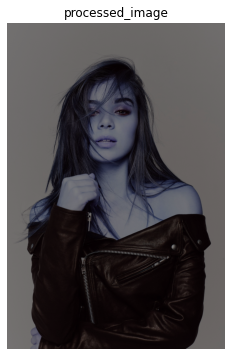

In [29]:
import pynq
from pynq import Overlay
from pynq.lib.dma import DMA
import numpy as np
from pynq import allocate
import cv2
import time
import matplotlib.pyplot as plt
# Load the overlay that includes the axi_dma_loopback module
overlay = Overlay("imageblureight.bit")
dma = overlay.axi_dma_0

# reading image
image_path = "hailee_resized3.jpg"
image = cv2.imread(image_path)
height, width, channel = image.shape
print(height, width, channel)

# preparing chunks
rows_per_chunk = 256  # size of the chunk
chunk_size = rows_per_chunk*width*channel

# allocating buffer
input_buffer = allocate(shape=(chunk_size), dtype=np.int8)
output_buffer = allocate(shape=(chunk_size), dtype=np.int8)

# initializing output image as all 0's
processed_image = np.zeros((height, width, channel), dtype=np.int8)
start_time = time.time()
for i in range(0, height, rows_per_chunk):
    print(i)
    start_row = i
    end_row = min(i+rows_per_chunk, height)
    chunk = image[start_row:end_row,:,:].flatten()
    np.copyto(input_buffer,chunk)
    
    dma.sendchannel.transfer(input_buffer)
    dma.recvchannel.transfer(output_buffer)
    
    dma.sendchannel.wait()
    dma.recvchannel.wait()
    
    processed_chunk = np.reshape(output_buffer,(end_row - start_row, width, channel))
    processed_image[start_row:end_row,:,:] = processed_chunk
    
end_time = time.time()
print(f"Processing Time: {end_time - start_time:.2f} seconds")
# save image in local machine
cv2.imwrite("uav.png",processed_image)
plt.figure(figsize=(6, 6))
plt.title("processed_image")
plt.imshow(processed_image)
plt.axis('off')
plt.show()

3120 2082 3


ValueError: cannot reshape array of size 49968 into shape (3120,2082,3)

In [2]:
import pynq
from pynq import Overlay
from pynq.lib.dma import DMA
import numpy as np
from pynq import allocate
import cv2

# Load the overlay that includes the axi_dma_loopback module
overlay = Overlay("imageblureight.bit")
dma = overlay.axi_dma_0

# reading image
image_path = "hailee.jpg"
image = cv2.imread(image_path)
height, width, channel = image.shape
print(height, width, channel)

# preparing chunks
rows_per_chunk = 8  # size of the chunk
chunk_size = rows_per_chunk*width*channel
chunk_size

# allocating buffer
input_buffer = allocate(shape=(chunk_size), dtype=np.int8)
output_buffer = allocate(shape=(chunk_size), dtype=np.int8)

# initializing output image as all 0's
processed_image = np.zeros((height, width, channel), dtype=np.int8)

for i in range(0, height, rows_per_chunk):
    print(i)
    start_row = i
    end_row = min(i+rows_per_chunk, height)
    chunk = image[start_row:end_row,:,:].flatten()
    np.copyto(input_buffer,chunk)
    
    dma.sendchannel.transfer(input_buffer)
    dma.recvchannel.transfer(output_buffer)
    
    dma.sendchannel.wait()
    dma.recvchannel.wait()
    
    processed_chunk = np.reshape(output_buffer,(end_row - start_row, width, channel))
    processed_image[start_row:end_row,:,:] = processed_chunk
    
# save image in local machine
cv2.imwrite("uav8.png",processed_image)

3120 2082 3
0
8
16
24
32
40
48
56
64
72
80
88
96
104
112
120
128
136
144
152
160
168
176
184
192
200
208
216
224
232
240
248
256
264
272
280
288
296
304
312
320
328
336
344
352
360
368
376
384
392
400
408
416
424
432
440
448
456
464
472
480
488
496
504
512
520
528
536
544
552
560
568
576
584
592
600
608
616
624
632
640
648
656
664
672
680
688
696
704
712
720
728
736
744
752
760
768
776
784
792
800
808
816
824
832
840
848
856
864
872
880
888
896
904
912
920
928
936
944
952
960
968
976
984
992
1000
1008
1016
1024
1032
1040
1048
1056
1064
1072
1080
1088
1096
1104
1112
1120
1128
1136
1144
1152
1160
1168
1176
1184
1192
1200
1208
1216
1224
1232
1240
1248
1256
1264
1272
1280
1288
1296
1304
1312
1320
1328
1336
1344
1352
1360
1368
1376
1384
1392
1400
1408
1416
1424
1432
1440
1448
1456
1464
1472
1480
1488
1496
1504
1512
1520
1528
1536
1544
1552
1560
1568
1576
1584
1592
1600
1608
1616
1624
1632
1640
1648
1656
1664
1672
1680
1688
1696
1704
1712
1720
1728
1736
1744
1752
1760
1768
1776
1784
1792
180

True